In [1]:
import jax.numpy as jnp
import numpy as np
from scipy import special
from scipy import stats
import numpyro
from numpyro.infer import MCMC, NUTS, Predictive
import numpyro.distributions as dist
from numpyro.contrib.control_flow import scan, cond
from jax import random
from jax import nn
import jax
import arviz as az
from matplotlib import pyplot as plt
import pandas as pd
az.rcParams["plot.max_subplots"] = 200
plt.rc('font', size=22, family='arial') 
plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major', width=1.5, size=6)
plt.rc('ytick.major', width=1.5, size=6)
plt.rc('mathtext', default='regular')

from matplotlib import pyplot as plt

import os
import pickle
import setup

import seaborn as sns
from rl_models import *

from utils import plot_mean_hpdi, nanmovmean

key = random.PRNGKey(0)

# RL model comparison

In [2]:
processed_data_dir = "../data/Processed"
processed_file_name = "processed"
# processed_file_name = "excluded"
figure_data_dir = "/Users/f005d7d/Documents/Attn_MdPRL/Py-attention-project-analysis/figures/All Processed"

with open(os.path.join(processed_data_dir, processed_file_name), "rb") as f:
        data = pickle.load(f)
stims, stimsF0, stimsF1, full_rwd, choices, valid_mask = make_batch(data)

with open(os.path.join(processed_data_dir, "mcmc"), 'rb') as f:
    all_models_mcmc = pickle.load(f)

compare_dict = {}

for k, v in all_models_mcmc.items():
    inf_data = az.from_numpyro(v)
    log_lik = inf_data.log_likelihood
    log_lik['choice_total'] = log_lik.sum('choice_dim_0').to_array()
    compare_dict[k] = az.waic(inf_data, var_name='choice_total', pointwise=True)


print('loaded all models')
print('starting model comparisons')
comp_df = az.compare(compare_dict, ic='waic')
print(comp_df)


/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python

loaded all models
starting model comparisons
       rank    elpd_waic      p_waic   elpd_diff        weight          se  \
F_AL      0 -3829.701787  154.839417    0.000000  3.829941e-01  102.297685   
F_ACL     1 -3830.636862  152.369659    0.935076  3.123566e-01  102.314930   
F_AC      2 -3841.475765  118.792595   11.773979  9.935595e-17  100.607215   
F_UA      3 -3864.599298   91.422157   34.897511  0.000000e+00   98.847082   
O         4 -3939.305099   82.242867  109.603312  3.046492e-01   94.843535   

             dse  warning scale  
F_AL    0.000000     True   log  
F_ACL   2.288007     True   log  
F_AC    5.680481     True   log  
F_UA   11.785727     True   log  
O      35.099010     True   log  


/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


In [3]:
with open(os.path.join(processed_data_dir, "mcmc_ablated"), 'rb') as f:
    all_models_mcmc_ablation = pickle.load(f)

compare_dict_ablation = {}

for k, v in all_models_mcmc_ablation.items():
    inf_data = az.from_numpyro(v)
    log_lik = inf_data.log_likelihood
    log_lik['choice_total'] = log_lik.sum('choice_dim_0').to_array()
    compare_dict_ablation[k] = az.waic(inf_data, var_name='choice_total')

inf_data = az.from_numpyro(all_models_mcmc['F_AL'])
log_lik = inf_data.log_likelihood
log_lik['choice_total'] = log_lik.sum('choice_dim_0').to_array()
compare_dict_ablation['F_AL'] = az.waic(inf_data, var_name='choice_total')

print('loaded all models')
print('starting model comparisons')
comp_df_ablation = az.compare(compare_dict_ablation, ic='waic')
print(comp_df_ablation)

# az.plot_compare(comp_df)
# plt.show()

/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


loaded all models
starting model comparisons
                rank    elpd_waic      p_waic  elpd_diff        weight  \
F_AL               0 -3829.701787  154.839417   0.000000  8.319269e-01   
F_AL_tied_attn     1 -3843.350363  118.201500  13.648576  1.680731e-01   
F_AL_tied_chfg     2 -3867.711060   88.582901  38.009274  3.153033e-13   

                        se        dse  warning scale  
F_AL            102.297685   0.000000     True   log  
F_AL_tied_attn  100.531762   7.492626     True   log  
F_AL_tied_chfg  100.109464  11.576024     True   log  


/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


In [4]:
az.summary(az.from_numpyro(all_models_mcmc['F_AL']), var_names=['mu', 'sigma'], stat_focus='median', hdi_prob=0.95)

,median,mad,eti_2.5%,eti_97.5%,mcse_median,ess_median,ess_tail,r_hat
mu[0],-0.018,0.020,-0.078,0.039,0.000,9991.655,5746.0,1.00
mu[1],1.250,0.063,1.073,1.437,0.004,1476.303,2947.0,1.00
mu[2],-1.526,0.101,-1.839,-1.230,0.003,3014.693,3361.0,1.00
mu[3],-2.443,0.238,-3.437,-1.918,0.006,4523.791,4019.0,1.00
mu[4],-1.710,0.131,-2.154,-1.351,0.005,2383.217,3960.0,1.00
mu[5],-3.045,0.265,-4.071,-2.427,0.006,6525.842,3976.0,1.00
mu[6],-2.919,0.264,-3.919,-2.319,0.007,4890.895,4658.0,1.00
mu[7],-1.080,0.097,-1.372,-0.808,0.005,1375.038,1727.0,1.00
mu[8],-3.051,0.258,-4.011,-2.450,0.006,7134.489,5203.0,1.00
mu[9],-1.420,0.098,-1.706,-1.128,0.004,1877.805,2313.0,1.00


<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/var/folders/vn/04h3k2gd41v70zhrqdwyg9cw0000gp/T/ipykernel_12841/127056132.py:16: SyntaxWarning: invalid escape sequence '\D'
  axes.set_ylabel('$\Delta$ WAIC')
/var/folders/vn/04h3k2gd41v70zhrqdwyg9cw0000gp/T/ipykernel_12841/127056132.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels=[label_mapper[name] for (idx_mdl, name) in enumerate(comp_df.index.values) if pie_wedges_to_plot[idx_mdl]],


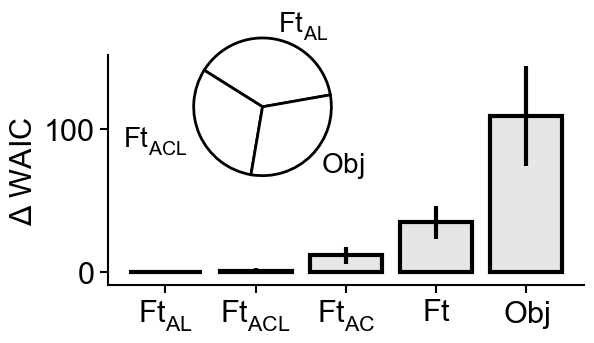

In [5]:
label_mapper = {
    'F_ACL': f'$Ft_{{ACL}}$',
    'F_AC': f'$Ft_{{AC}}$',
    'F_AL': f'$Ft_{{AL}}$',
    'F_UA': f'$Ft$',
    'O': f'$Obj$',
}


fig, axes = plt.subplots(figsize=(6.4,4))

axes.bar(np.arange(comp_df.shape[0]), comp_df.loc[:,'elpd_diff'], 
         edgecolor='black', facecolor=[0.9,0.9,0.9], yerr=comp_df.loc[:,'dse'],
         lw=3, error_kw = {'elinewidth': 3})
axes.set_xticks(np.arange(comp_df.shape[0]), [label_mapper[name] for name in comp_df.index.values])
axes.set_ylabel('$\Delta$ WAIC')
sns.despine()

pie_wedges_to_plot = comp_df.loc[:,'weight']>0.01


axin = axes.inset_axes([-0.05, 0.4, 0.75, 0.75])
axin.pie(comp_df.loc[:,'weight'][pie_wedges_to_plot], 
         labels=[label_mapper[name] for (idx_mdl, name) in enumerate(comp_df.index.values) if pie_wedges_to_plot[idx_mdl]], 
         colors=[[1,1,1]]*comp_df.shape[0], wedgeprops=dict(linewidth=2, width=1, edgecolor='k'), autopct=None,
         labeldistance=1.2, textprops={'fontsize': 20}, startangle=10)


fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_model_comparison.pdf"))


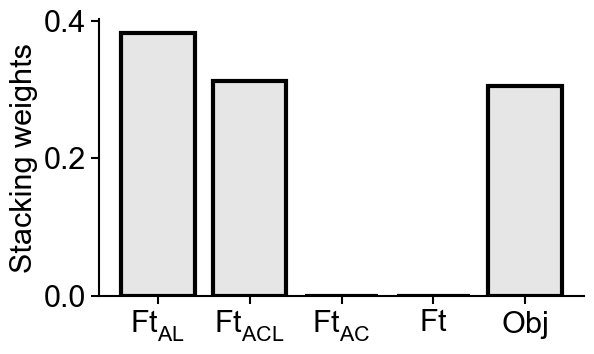

In [6]:
fig, axes = plt.subplots(figsize=(6.4,4))

axes.bar(np.arange(comp_df.shape[0]), comp_df.loc[:,'weight'], edgecolor='black', facecolor=[0.9,0.9,0.9], lw=3)
axes.set_xticks(np.arange(comp_df.shape[0]), [label_mapper[name] for name in comp_df.index.values])
axes.set_ylabel('Stacking weights')

sns.despine()
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_weights.pdf"))


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/var/folders/vn/04h3k2gd41v70zhrqdwyg9cw0000gp/T/ipykernel_11579/316450218.py:7: SyntaxWarning: invalid escape sequence '\D'
  axes.set_ylabel('$\Delta$ WAIC')


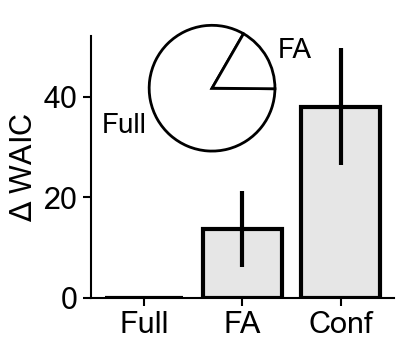

In [7]:
fig, axes = plt.subplots(figsize=(4.5,4))

axes.bar(np.arange(comp_df_ablation.shape[0]), comp_df_ablation.loc[:,'elpd_diff'], 
         edgecolor='black', facecolor=[0.9,0.9,0.9], yerr=comp_df_ablation.loc[:,'dse'],
         lw=3, error_kw = {'elinewidth': 3})
axes.set_xticks(np.arange(comp_df_ablation.shape[0]), ['Full', 'FA', 'Conf'])
axes.set_ylabel('$\Delta$ WAIC')
sns.despine()

pie_wedges_to_plot = comp_df.loc[:,'weight']>0.01


axin = axes.inset_axes([0.1, 0.5, 0.6, 0.6])
axin.pie(comp_df_ablation.loc[:,'weight'][:-1], labels=['Full', 'FA'], 
         colors=[[1,1,1]]*comp_df.shape[0], wedgeprops=dict(linewidth=2, width=1, edgecolor='k'), autopct=None,
         labeldistance=1.2, textprops={'fontsize': 20}, pctdistance=0.65, startangle=60)


fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_model_comparison_ablation.pdf"))


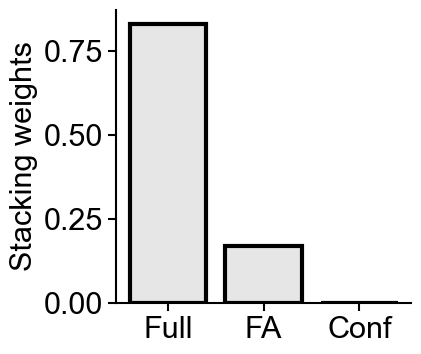

In [8]:
fig, axes = plt.subplots(figsize=(4.5,4))

axes.bar(np.arange(comp_df_ablation.shape[0]), comp_df_ablation.loc[:,'weight'], edgecolor='black', facecolor=[0.9,0.9,0.9], lw=3)
axes.set_xticks(np.arange(comp_df_ablation.shape[0]), ['Full', 'FA', 'Conf'])
axes.set_ylabel('Stacking weights')

sns.despine()
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_weights_ablation.pdf"))


In [14]:
F_model_inf_data = all_models_mcmc['F_AL']
F_UA_model_inf_data = all_models_mcmc['F_UA']
O_model_inf_data = all_models_mcmc['O']

F_trialwise_waic = az.waic(F_model_inf_data, pointwise=True)
F_UA_trialwise_waic = az.waic(F_UA_model_inf_data, pointwise=True)
O_trialwise_waic = az.waic(O_model_inf_data, pointwise=True)



/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [15]:
w_size = 20

dF_O_trialwise_waic_df = pd.DataFrame(F_trialwise_waic.waic_i.values.shape[1]*\
                                      nanmovmean(F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values, w_size).T)
# dFO_F_trialwise_waic_df = pd.DataFrame(nanmovmean(FO_trialwise_waic.values[6].values-F_trialwise_waic.values[6].values, w_size))
# dFO_O_trialwise_waic_df = pd.DataFrame(nanmovmean(FO_trialwise_waic.values[6].values-O_trialwise_waic.values[6].values, w_size))
# FO_trialwise_waic_df = pd.DataFrame(FO_trialwise_waic.values[6].values)

dF_O_trialwise_waic_df = dF_O_trialwise_waic_df.melt(value_vars=list(range(128-w_size)), var_name='trial', value_name='F-O')
# dFO_F_trialwise_waic_df = dFO_F_trialwise_waic_df.melt(value_vars=list(range(128-w_size)), var_name='trial', value_name='FO-F')
# dFO_O_trialwise_waic_df = dFO_O_trialwise_waic_df.melt(value_vars=list(range(128-w_size)), var_name='trial', value_name='FO-O')
# FO_trialwise_waic_df = FO_trialwise_waic_df.melt(value_vars=list(range(128)), var_name='trial', value_name='waic_FO')

# trialwise_waic_df = pd.concat([dF_O_trialwise_waic_df, dFO_F_trialwise_waic_df.get('FO-F'), dFO_O_trialwise_waic_df.get('FO-O')], axis=1)
trialwise_waic_df = dF_O_trialwise_waic_df.melt(value_vars=['F-O'], id_vars='trial', var_name='model pairs', value_name='waic')

dF_O_subjwise_waic_df = np.sort((F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0))




In [16]:
num_subj = F_trialwise_waic.waic_i.values.shape[1]
trial_idx = np.arange(setup.EXPERIMENT_SETUP['numChoiceTrials'])[:,None]
trial_idx = np.repeat(trial_idx/setup.EXPERIMENT_SETUP['numChoiceTrials'], num_subj, axis=1).flatten()

subj_idx = np.stack([sesdata['ID']*np.ones(setup.EXPERIMENT_SETUP['numChoiceTrials']) for sesdata in data], axis=1).flatten()

trialwise_WAIC_df = pd.DataFrame(np.stack([trial_idx,
                                           (F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).flatten(),
                                           subj_idx], axis=1), 
              columns=['trial', 'dWAIC', 'subj'])

trialwise_WAIC_df.to_csv(os.path.join(processed_data_dir, f'trialwise_waic.csv'), index=False)



<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
/var/folders/vn/04h3k2gd41v70zhrqdwyg9cw0000gp/T/ipykernel_2241/2416072488.py:36: SyntaxWarning: invalid escape sequence '\D'
  axes[1].set_ylabel('$\Delta$ WAIC')


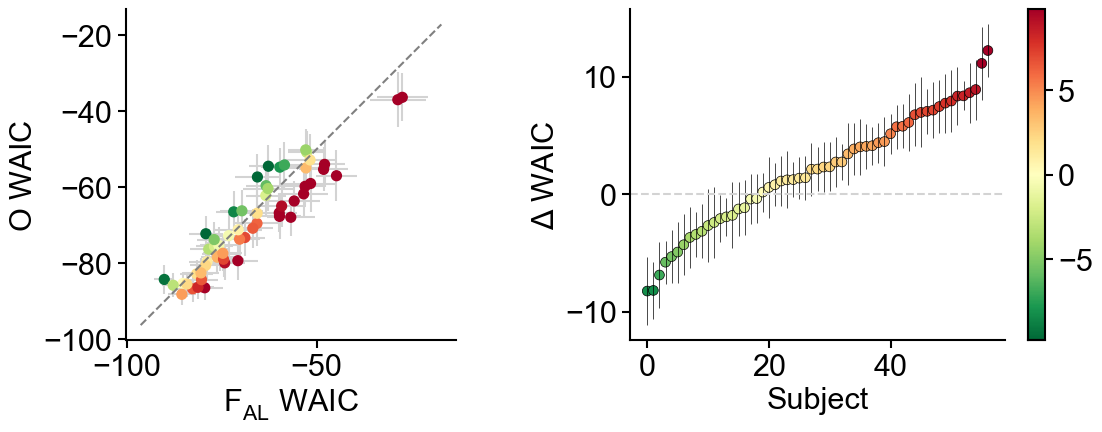

In [24]:
fig, axes = plt.subplots(1,2,figsize=(12,4.8))


axes[0].errorbar(x=F_trialwise_waic.waic_i.values.sum(0), y=O_trialwise_waic.waic_i.values.sum(0), 
              xerr=np.sqrt(F_trialwise_waic.waic_i.shape[0])*F_trialwise_waic.waic_i.values.std(0),
              yerr=np.sqrt(O_trialwise_waic.waic_i.shape[0])*O_trialwise_waic.waic_i.values.std(0),
              linestyle='', ecolor='lightgrey', zorder=0)
scp = axes[0].scatter(F_trialwise_waic.waic_i.values.sum(0), O_trialwise_waic.waic_i.values.sum(0), 
                c=(F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0), cmap='RdYlGn_r',
                vmin=-np.abs((F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)).max()*0.5, 
                vmax=np.abs((F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)).max()*0.5, 
                s=50)
axes[0].plot(np.linspace(axes[0].get_xlim()[0], axes[0].get_xlim()[1]), 
             np.linspace(axes[0].get_xlim()[0], axes[0].get_xlim()[1]),
             '--', color='grey')
axes[0].set_xlabel('$F_{AL}$ WAIC')
axes[0].set_ylabel('$O$ WAIC')
axes[0].set_aspect('equal')
# plt.colorbar(scp)


fit_diff_ind = np.argsort(F_trialwise_waic.waic_i.values.sum(0)-O_trialwise_waic.waic_i.values.sum(0))

scp=axes[1].scatter(np.arange(F_trialwise_waic.waic_i.values.shape[1]), 
             (F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)[fit_diff_ind],
             c=(F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)[fit_diff_ind], cmap='RdYlGn_r',
             vmin=-np.abs((F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)).max()*0.8, 
             vmax=np.abs((F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)).max()*0.8, 
             s=50, edgecolors='k', linewidths=0.5)
axes[1].errorbar(np.arange(F_trialwise_waic.waic_i.values.shape[1]), 
        (F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).sum(0)[fit_diff_ind],
        (F_trialwise_waic.waic_i.values-O_trialwise_waic.waic_i.values).std(0)[fit_diff_ind]*np.sqrt(F_trialwise_waic.waic_i.values.shape[1]),
        linestyle='', ecolor='black', elinewidth=0.5)
axes[1].axhline(0, linestyle='--', color='lightgrey')
axes[1].set_xlabel('Subject')
axes[1].set_ylabel('$\Delta$ WAIC')
plt.colorbar(scp)

sns.despine()

fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_model_comparison_by_subj.pdf"))

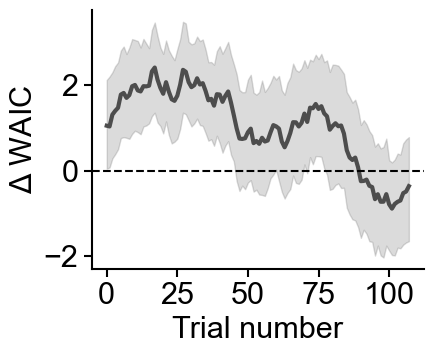

In [17]:
fig, axes = plt.subplots(figsize=(4.8, 4))

sns.lineplot(trialwise_waic_df, x='trial', y='waic', hue='model pairs', ax=axes, legend=None, palette=[np.zeros(3)+0.3], lw=3)
axes.axhline(0, linestyle='--', color='k')
axes.set_xticks(np.arange(0, 101, 25))
axes.set_ylabel(r'$\Delta$ WAIC')
axes.set_xlabel('Trial number')

sns.despine()

fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_trialwise_waic.pdf"))

# RL parameter estimations

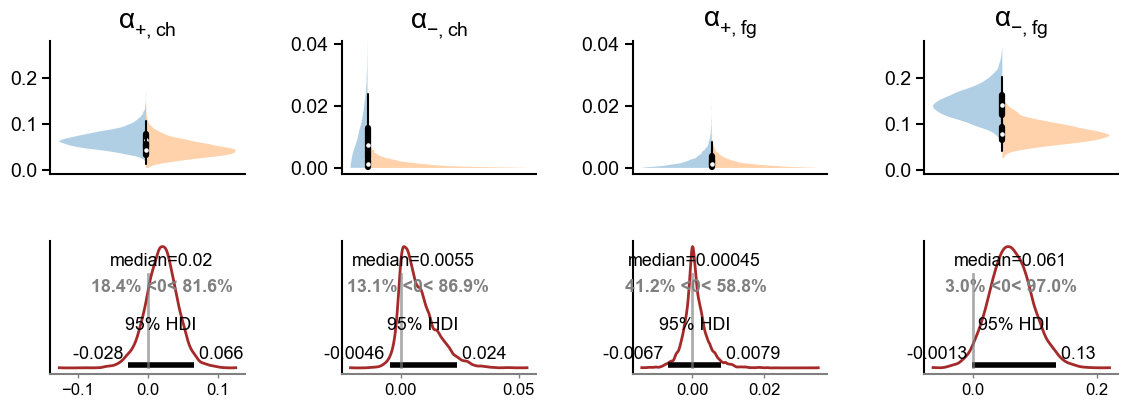

In [9]:
fig, axes = plt.subplots(2,4,figsize=(12,4.8))

inf_data = az.from_numpyro(all_models_mcmc['F_AL'])
post = inf_data.posterior

lr_start = 2

post['alpha+_c,0'] = special.ndtr(post['mu'][...,lr_start])
post['alpha+_c,1'] = special.ndtr(post['mu'][...,lr_start+2])
post['alpha-_c,0'] = special.ndtr(post['mu'][...,lr_start+1])
post['alpha-_c,1'] = special.ndtr(post['mu'][...,lr_start+3])

post['alpha+_f,0'] = special.ndtr(post['mu'][...,lr_start+4])
post['alpha+_f,1'] = special.ndtr(post['mu'][...,lr_start+6])
post['alpha-_f,0'] = special.ndtr(post['mu'][...,lr_start+5])
post['alpha-_f,1'] = special.ndtr(post['mu'][...,lr_start+7])


az.plot_violin(
    inf_data,
    var_names=['alpha+_c,0', 'alpha-_c,0', 
                'alpha+_f,0', 'alpha-_f,0'],
    side="left",
    ax=axes[0],
    hdi_prob=0.95,
    sharey=True,
)

az.plot_violin(
    inf_data,
    var_names=['alpha+_c,1', 'alpha-_c,1', 
                'alpha+_f,1', 'alpha-_f,1'],
    side="right",
    ax=axes[0],
    hdi_prob=0.95,
    sharey=True,
)

axes[0,0].set_title(r'$\alpha_{+, ch}$', fontsize=20)
axes[0,1].set_title(r'$\alpha_{-, ch}$', fontsize=20)
axes[0,2].set_title(r'$\alpha_{+, fg}$', fontsize=20)
axes[0,3].set_title(r'$\alpha_{-, fg}$', fontsize=20)

for a in axes[0]:
    a.tick_params(left=True)

axes[0,0].set_ylim(-0.01, 0.28)
axes[0,3].set_ylim(-0.01, 0.28)
axes[0,0].set_yticks(np.arange(0,0.21,0.1))
axes[0,3].set_yticks(np.arange(0,0.21,0.1))

axes[0,1].set_ylim(-0.002, 0.041)
axes[0,2].set_ylim(-0.002, 0.041)
axes[0,1].set_yticks(np.arange(0,0.041,0.02))
axes[0,2].set_yticks(np.arange(0,0.041,0.02))


# post['diff_beta'] = np.exp(post['mu'][...,1])-np.exp(post['mu'][...,2])
post['diff_ch_r'] = (special.ndtr(post['mu'][...,lr_start])-special.ndtr(post['mu'][...,lr_start+2]))
post['diff_ch_nr'] = (special.ndtr(post['mu'][...,lr_start+1])-special.ndtr(post['mu'][...,lr_start+3]))
post['diff_fg_r'] = (special.ndtr(post['mu'][...,lr_start+4])-special.ndtr(post['mu'][...,lr_start+6]))
post['diff_fg_nr'] = (special.ndtr(post['mu'][...,lr_start+5])-special.ndtr(post['mu'][...,lr_start+7]))
# post['diff_decay'] = special.ndtr(post['mu'][...,11])-special.ndtr(post['mu'][...,12])

pp = az.plot_posterior(inf_data, var_names=['diff_ch_r', 'diff_ch_nr', 'diff_fg_r', 'diff_fg_nr'], color='brown',
                    point_estimate='median', hdi_prob=0.95, ref_val=0, ref_val_color='grey', ax=axes[1], textsize=12, lw=2)

for a in axes[1]:
    a.set_title('')

# axes[1,0].set_title(r'$\alpha_{+, chosen}$')
# axes[1,1].set_title(r'$\alpha_{-, chosen}$')
# axes[1,2].set_title(r'$\alpha_{+, forgone}$')
# axes[1,3].set_title(r'$\alpha_{-, forgone}$')

sns.despine()
plt.tight_layout(pad=1.5, h_pad=2)
plt.savefig(os.path.join(figure_data_dir, "rl_param_forest_old.pdf"))


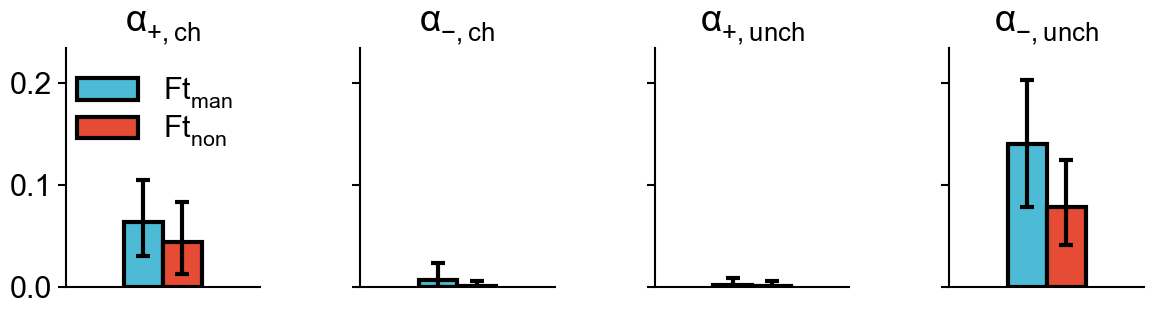

In [139]:
from numpyro.diagnostics import hpdi

fig, axes = plt.subplots(1,4, figsize=(12, 3.6), sharey=True)

param_medians = [
    np.median(post['alpha+_c,0']), np.median(post['alpha+_c,1']), np.median(post['alpha-_c,0']), np.median(post['alpha-_c,1']),
    np.median(post['alpha+_f,0']), np.median(post['alpha+_f,1']), np.median(post['alpha-_f,0']), np.median(post['alpha-_f,1']),
]

param_hdpis = [
    hpdi(post['alpha+_c,0'].values.flatten(), prob=0.95), hpdi(post['alpha+_c,1'].values.flatten(), prob=0.95), 
    hpdi(post['alpha-_c,0'].values.flatten(), prob=0.95), hpdi(post['alpha-_c,1'].values.flatten(), prob=0.95),
    hpdi(post['alpha+_f,0'].values.flatten(), prob=0.95), hpdi(post['alpha+_f,1'].values.flatten(), prob=0.95), 
    hpdi(post['alpha-_f,0'].values.flatten(), prob=0.95), hpdi(post['alpha-_f,1'].values.flatten(), prob=0.95),
]
param_hdpis = np.stack(param_hdpis, 1)
param_hdpis[0] = param_medians-param_hdpis[0]
param_hdpis[1] = param_hdpis[1]-param_medians

bar_width=0.05

titles = [r'$\alpha_{+, ch}$', r'$\alpha_{-, ch}$', r'$\alpha_{+, unch}$', r'$\alpha_{-, unch}$']

for i in range(4):
    axes[i].bar(-bar_width, param_medians[i*2], bar_width*2, yerr=param_hdpis[:,i*2:i*2+1],
         color='#4dbbd5', edgecolor='k', linewidth=3, capsize=5, error_kw={'elinewidth': 3, 'capthick': 3}, label=r'$Ft_{man}$')
    axes[i].bar(bar_width, param_medians[i*2+1], bar_width*2, yerr=param_hdpis[:,i*2+1:i*2+2],
         color='#e64b35', edgecolor='k', linewidth=3, capsize=5, error_kw={'elinewidth': 3, 'capthick': 3}, label=r'$Ft_{non}$')
    axes[i].set_title(titles[i])
    axes[i].set_xticks([])
    axes[i].set_xlim([-0.25, 0.25])

axes[0].legend(frameon=False, bbox_to_anchor=(1.0, 1.0), labelspacing=0.1)
axes[0].set_ylim(1.1*np.array(axes[0].get_ylim()))

sns.despine()

fig.tight_layout(w_pad=3)
plt.savefig(os.path.join(figure_data_dir, "rl_param_forest.pdf"))


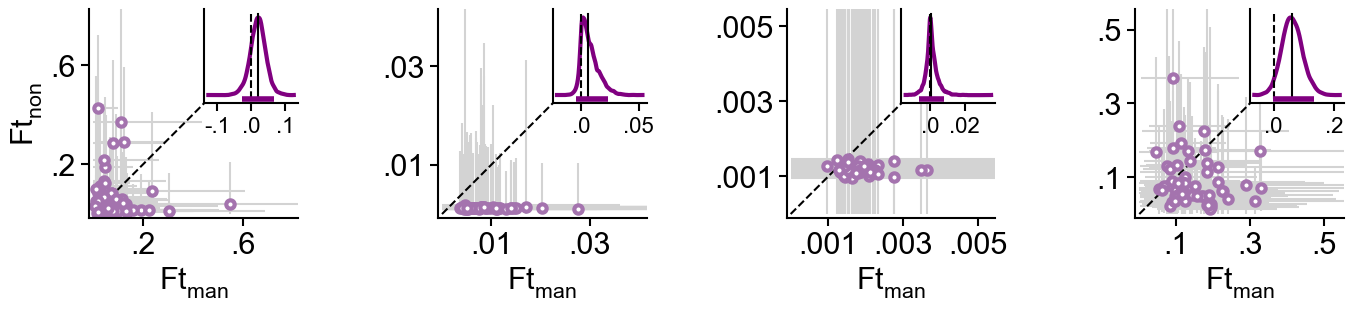

In [142]:
lr_start=2

subj_lrs = special.ndtr(
    post['subj_params'][...,[lr_start, lr_start+2, lr_start+1, lr_start+3, 
                             lr_start+4, lr_start+6, lr_start+5, lr_start+7]].values)
subj_lrs_median = np.median(subj_lrs, (0,1))

diffs_to_plot = ['diff_ch_r', 'diff_ch_nr', 'diff_fg_r', 'diff_fg_nr']

fig, axes = plt.subplots(1, 4, figsize=(14, 4.8))

for i in range(4):
    
    x_errs = hpdi(subj_lrs[...,2*i].reshape((-1, num_subj)), 0.95)
    x_errs[0] = subj_lrs_median[...,i*2]-x_errs[0]
    x_errs[1] = x_errs[1]-subj_lrs_median[...,i*2]

    y_errs = hpdi(subj_lrs[...,2*i+1].reshape((-1, num_subj)), 0.95)
    y_errs[0] = subj_lrs_median[...,i*2+1]-y_errs[0]
    y_errs[1] = y_errs[1]-subj_lrs_median[...,i*2+1]

    ax_lim = np.max([np.max(subj_lrs_median[...,i*2]), 
                     np.max(subj_lrs_median[...,i*2+1])])*1.5

    lr_diff_vals = post[diffs_to_plot[i]].values.flatten()
    diff_hpdi = hpdi(lr_diff_vals, 0.95)
    diff_median = np.median(lr_diff_vals)
    
    axes[i].errorbar(subj_lrs_median[:,i*2], subj_lrs_median[:,i*2+1], fmt='o', 
                     xerr=x_errs, yerr=y_errs, ecolor='lightgrey', 
                     mec='#A473AE', mfc='white', ms=6, mew=3)
    axes[i].plot([0, ax_lim], [0, ax_lim], '--k')
    axes[i].set_xlabel(r'$Ft_{man}$')
    axes[i].set_aspect('equal', 'box')
    
    axes[i].set_xlim([-0.02*ax_lim, ax_lim])
    axes[i].set_ylim([-0.02*ax_lim, ax_lim])

    xticklabels = np.round(axes[i].get_yticks(), 4)[0::2]
    axes[i].set_xticks(xticklabels, [str(label).replace("0.", ".") for label in xticklabels])
    yticklabels = np.round(axes[i].get_yticks(), 4)[0::2]
    axes[i].set_yticks(yticklabels, [str(label).replace("0.", ".") for label in yticklabels])

    axes[i].set_xlim([-0.02*ax_lim, ax_lim])
    axes[i].set_ylim([-0.02*ax_lim, ax_lim])

    axins = axes[i].inset_axes([0.55, 0.55, 0.45, 0.45])
    az.plot_kde(lr_diff_vals, ax=axins, plot_kwargs={'lw': 3, 'color': 'purple'})

    axins.set_yticks([])
    xticklabels = np.round(axins.get_xticks(), 2)
    axins.set_xticks(xticklabels, [str(label).replace("0.", ".") for label in xticklabels], fontsize=16)

    ylims = np.array(axins.get_ylim())

    axins.plot([0,0], ylims, '--k')
    axins.plot([diff_median, diff_median], ylims, '-k')

    # axins.scatter(diff_median, 0, facecolor='white', edgecolors='brown', linewidths=2, zorder=5)
    axins.plot(diff_hpdi, [ylims[0], ylims[0]], '-', c='purple', lw=4, solid_capstyle='butt')


    sns.despine(ax=axins)


axes[0].set_ylabel(r'$Ft_{non}$')


# axes[0].set_title(r'$\alpha_{+, ch}$')
# axes[1].set_title(r'$\alpha_{-, ch}$')
# axes[2].set_title(r'$\alpha_{+, unch}$')
# axes[3].set_title(r'$\alpha_{-, unch}$')


fig.tight_layout(w_pad=2)
sns.despine()
plt.savefig(os.path.join(figure_data_dir, "rl_param_scatter_diffs.pdf"))


In [5]:
print(az.summary(post, var_names=["diff_ch_r", "diff_ch_nr", "diff_fg_r", "diff_fg_nr", ], 
                            stat_focus='mean', hdi_prob=0.95, round_to=4))

print()

for var_name in ["diff_ch_r", "diff_ch_nr", "diff_fg_r", "diff_fg_nr", ]:
    print(max(np.mean(post[var_name]<0).values, 1-np.mean(post[var_name]<0).values))

              mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
diff_ch_r   0.0196  0.0235   -0.0284     0.0662     0.0005   0.0004   
diff_ch_nr  0.0072  0.0076   -0.0046     0.0236     0.0001   0.0001   
diff_fg_r   0.0009  0.0035   -0.0067     0.0079     0.0000   0.0000   
diff_fg_nr  0.0617  0.0345   -0.0013     0.1336     0.0009   0.0007   

             ess_bulk   ess_tail   r_hat  
diff_ch_r   1966.6127  3568.4266  1.0016  
diff_ch_nr  3425.7365  4771.1082  1.0009  
diff_fg_r   5520.0388  5314.0279  1.0005  
diff_fg_nr  1358.8157  3006.9144  1.0019  

0.8160000000000001
0.869125
0.5880000000000001
0.969625


In [10]:
post['ch_lr_bias_0'] = post['alpha+_c,0']-post['alpha-_c,0']
post['ch_lr_bias_1'] = post['alpha+_c,1']-post['alpha-_c,1']
post['ch_lr_bias_attn'] = post['ch_lr_bias_0']-post['ch_lr_bias_1']
post['fg_lr_bias_0'] = post['alpha+_f,0']-post['alpha-_f,0']
post['fg_lr_bias_1'] = post['alpha+_f,1']-post['alpha-_f,1']
post['fg_lr_bias_attn'] = post['fg_lr_bias_0']-post['fg_lr_bias_1']
post['ch_fg_lr_bias_0'] = -post['fg_lr_bias_0']-post['ch_lr_bias_0']
post['ch_fg_lr_bias_1'] = -post['fg_lr_bias_1']-post['ch_lr_bias_1']
print(az.summary(post, var_names=["ch_lr_bias_0", "ch_lr_bias_1", 
                            "fg_lr_bias_0", "fg_lr_bias_1",
                            "ch_lr_bias_attn", "fg_lr_bias_attn",
                            "ch_fg_lr_bias_0", "ch_fg_lr_bias_1"], 
                            stat_focus='mean', hdi_prob=0.95, round_to=4))

print()
for var_name in ["ch_lr_bias_0", "ch_lr_bias_1", 
                "fg_lr_bias_0", "fg_lr_bias_1",
                "ch_lr_bias_attn", "fg_lr_bias_attn",
                "ch_fg_lr_bias_0", "ch_fg_lr_bias_1"]:
    print(max(np.mean(post[var_name]<0).values, 1-np.mean(post[var_name]<0).values))

                   mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
ch_lr_bias_0     0.0563  0.0207    0.0180     0.0991     0.0005   0.0003   
ch_lr_bias_1     0.0440  0.0189    0.0105     0.0825     0.0005   0.0003   
fg_lr_bias_0    -0.1392  0.0322   -0.2002    -0.0749     0.0011   0.0008   
fg_lr_bias_1    -0.0783  0.0220   -0.1245    -0.0396     0.0006   0.0004   
ch_lr_bias_attn  0.0123  0.0247   -0.0394     0.0593     0.0006   0.0004   
fg_lr_bias_attn -0.0609  0.0349   -0.1347     0.0025     0.0009   0.0007   
ch_fg_lr_bias_0  0.0829  0.0380    0.0131     0.1625     0.0014   0.0010   
ch_fg_lr_bias_1  0.0344  0.0300   -0.0244     0.0937     0.0009   0.0006   

                  ess_bulk   ess_tail   r_hat  
ch_lr_bias_0     1871.7670  3216.6305  1.0043  
ch_lr_bias_1     1711.9091  3772.8108  1.0036  
fg_lr_bias_0      741.3879  1635.1115  1.0014  
fg_lr_bias_1     1272.2754  2328.0147  1.0021  
ch_lr_bias_attn  1782.5549  3307.7794  1.0021  
fg_lr_bias_attn  1353.4974 

In [7]:
all_Xs = []
all_Ys = []

for idx_subj, sesdata in enumerate(data):
    manip_correct = sesdata['passive_question_correct'].mean()
    manip_rt = (sesdata['passive_question_rt']).mean()
    
    all_Xs.append(np.stack([manip_correct, manip_rt])[:,None].T)

all_Xs = np.concatenate(all_Xs, 0)

SignificanceResult(statistic=-0.03527332709565219, pvalue=0.7944866965608515)
SignificanceResult(statistic=-0.09888096612059875, pvalue=0.4642955480331117)
SignificanceResult(statistic=-0.00809551769408411, pvalue=0.9523414626432701)
SignificanceResult(statistic=0.09100785275876971, pvalue=0.5007748005395035)


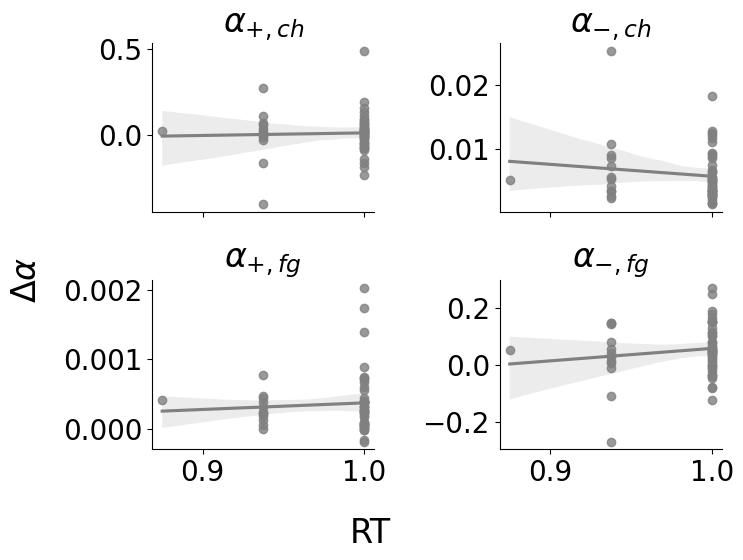

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

print(stats.spearmanr(all_Xs[:,0], np.median(special.ndtr(post['subj_params'][...,lr_start])-
                                             special.ndtr(post['subj_params'][...,lr_start+2]), (0,1))))
print(stats.spearmanr(all_Xs[:,0], np.median(special.ndtr(post['subj_params'][...,lr_start+1])-
                                             special.ndtr(post['subj_params'][...,lr_start+3]), (0,1))))
print(stats.spearmanr(all_Xs[:,0], np.median(special.ndtr(post['subj_params'][...,lr_start+4])-
                                             special.ndtr(post['subj_params'][...,lr_start+6]), (0,1))))
print(stats.spearmanr(all_Xs[:,0], np.median(special.ndtr(post['subj_params'][...,lr_start+5])-
                                             special.ndtr(post['subj_params'][...,lr_start+7]), (0,1))))


sns.regplot(x=all_Xs[:,0], 
           y=np.median(special.ndtr(post['subj_params'][...,lr_start])-special.ndtr(post['subj_params'][...,lr_start+2]), (0,1)),
           ax=axes[0,0], color='grey')
sns.regplot(x=all_Xs[:,0], 
           y=np.median(special.ndtr(post['subj_params'][...,lr_start+1])-special.ndtr(post['subj_params'][...,lr_start+3]), (0,1)),
           ax=axes[0,1], color='grey')
sns.regplot(x=all_Xs[:,0], 
           y=np.median(special.ndtr(post['subj_params'][...,lr_start+4])-special.ndtr(post['subj_params'][...,lr_start+6]), (0,1)),
           ax=axes[1,0], color='grey')
sns.regplot(x=all_Xs[:,0], 
           y=np.median(special.ndtr(post['subj_params'][...,lr_start+5])-special.ndtr(post['subj_params'][...,lr_start+7]), (0,1)),
           ax=axes[1,1], color='grey')


axes[0,0].set_title(r'$\alpha_{+, ch}$')
axes[0,1].set_title(r'$\alpha_{-, ch}$')
axes[1,0].set_title(r'$\alpha_{+, fg}$')
axes[1,1].set_title(r'$\alpha_{-, fg}$')

fig.supxlabel('RT', y=0.05)
fig.supylabel(r'$\Delta \alpha$', x=0.05)

sns.despine()
fig.tight_layout()

SignificanceResult(statistic=-0.19509308025413685, pvalue=0.14586202060910372)


Text(0, 0.5, '$\\Delta WAIC$')

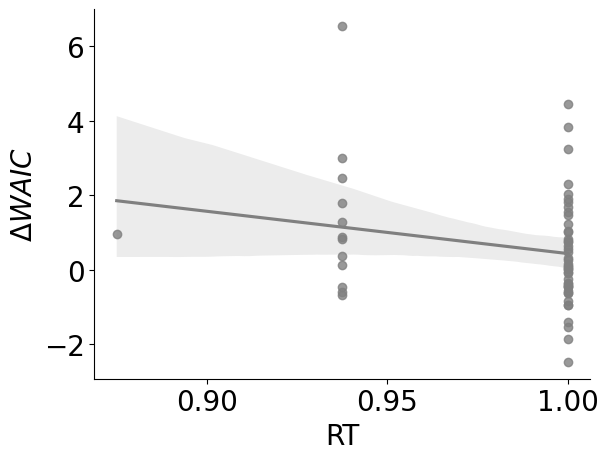

In [10]:
print(stats.spearmanr(all_Xs[:,0], (compare_dict['F_AL'].waic_i.values-compare_dict['F_UA'].waic_i.values).squeeze()))
sns.regplot(x=all_Xs[:,0], 
            y=(compare_dict['F_AL'].waic_i.values-compare_dict['F_UA'].waic_i.values).squeeze(), 
            color='grey')
sns.despine()
plt.xlabel('RT')
plt.ylabel(r'$\Delta WAIC$')

# Inspecting RL latent variables (subjective value)

In [7]:
from numpyro.infer import Predictive


num_samples_for_sim = 1000
num_total_samples = all_models_mcmc['F_AL'].get_samples()['mu'].shape[0]


# FO_predictive_model = Predictive(static_feature_object_based_model_group, all_models_mcmc['F+O_static'].get_samples())
F_samples = all_models_mcmc['F_AL'].get_samples()
key, subkey = random.split(key)
thinning_samples = random.randint(subkey, (num_samples_for_sim,), 0, num_total_samples)
F_samples_thinned = {k: v[thinning_samples] for (k,v) in F_samples.items()}
F_predictive_model = Predictive(feature_based_model_group_AL, F_samples_thinned)

O_samples = all_models_mcmc['O'].get_samples()
key, subkey = random.split(key)
thinning_samples = random.randint(subkey, (num_samples_for_sim,), 0, num_total_samples)
O_samples_thinned = {k: v[thinning_samples] for (k,v) in O_samples.items()}
O_predictive_model = Predictive(object_based_model_group, O_samples_thinned)

In [8]:
key, subkey = random.split(key)
posterior_fixed_choice_F = F_predictive_model(subkey, stims, stimsF0, stimsF1, full_rwd, choices, valid_mask, save_values=True)
key, subkey = random.split(key)
posterior_fixed_choice_O = O_predictive_model(subkey, stims, stimsF0, stimsF1, full_rwd, choices, valid_mask, save_values=True)

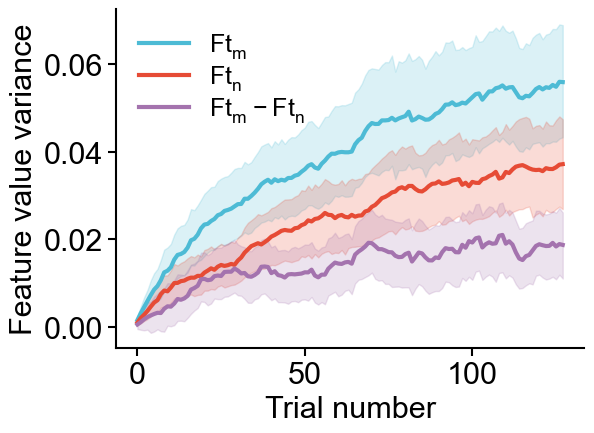

In [9]:
fig, ax = plt.subplots()
plot_mean_hpdi(ax,
    (posterior_fixed_choice_F['values']).var(-1)[...,0].mean(2),
    color='#4dbbd5', label=r'$Ft_{m}$')
plot_mean_hpdi(ax,
    (posterior_fixed_choice_F['values']).var(-1)[...,1].mean(2),
    color='#e64b35', label=r'$Ft_n$')
plot_mean_hpdi(ax,
    (posterior_fixed_choice_F['values']).var(-1)[...,0].mean(2)-(posterior_fixed_choice_F['values']).var(-1)[...,1].mean(2),
    color='#A473AE', label=r'$Ft_m-Ft_n$')
sns.despine()

ax.legend(fontsize=18, frameon=False, labelspacing=0.1)
ax.set_xlabel('Trial number')
ax.set_ylabel('Feature value variance')
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_ft_val_var.pdf"))

In [236]:
num_est_trials = len(setup.EXPERIMENT_SETUP['locEstimationTrials'])
est_trials = setup.EXPERIMENT_SETUP['locEstimationTrials']

all_Xs = []
all_Ys = []
for idx_trial in range(num_est_trials):
    for idx_subj, sesdata in enumerate(data):
        pO = posterior_fixed_choice_O['values'].mean(0)[est_trials[idx_trial],idx_subj]
        pF = posterior_fixed_choice_F['values'].mean(0)[est_trials[idx_trial],idx_subj]

        stimOs = sesdata['est_stims'][idx_trial*setup.EXPERIMENT_SETUP['num_objects']:(idx_trial+1)*setup.EXPERIMENT_SETUP['num_objects']]
        prob_est = sesdata['est_values'][idx_trial*setup.EXPERIMENT_SETUP['num_objects']:(idx_trial+1)*setup.EXPERIMENT_SETUP['num_objects']]/100
        stimF1 = stimOs//setup.EXPERIMENT_SETUP['num_vals']
        stimF2 = stimOs%setup.EXPERIMENT_SETUP['num_vals']
        
        subj_pO = pO[stimOs]
        if sesdata['infDimension']==1:
            subj_pF = (pF[0,stimF1]+pF[1,stimF2])/2
        elif sesdata['infDimension']==2:
            subj_pF = (pF[0,stimF2]+pF[1,stimF1])/2
        else:
            raise ValueError

        all_Xs.append(np.stack([special.logit(subj_pF), special.logit(subj_pO), 
                                (sesdata['ID']*np.ones_like(stimOs)).astype(int), 
                                (idx_trial*np.ones_like(stimOs)).astype(int)], 
                                axis=1))
        all_Ys.append(special.logit(np.clip(prob_est, 1e-2, 1-1e-2)))

all_Xs = np.concatenate(all_Xs, 0)
all_Ys = np.concatenate(all_Ys, 0)[:, None]

all_data = pd.DataFrame(np.concatenate([all_Xs, all_Ys], axis=1), columns=['pF', 'pO', 'subj', 'bout', 'prob']).fillna(0)

all_data.to_csv(os.path.join(processed_data_dir, f'fit_subj_value_df.csv'), index=False)


# Posterior predictive simulations

In [10]:
# posterior_predictive_FO = FO_predictive_model(random.PRNGKey(0), stims, stimsF0, stimsF1, full_rwd, choices, None)
key, subkey = random.split(key)
posterior_predictive_F = F_predictive_model(subkey, stims, stimsF0, stimsF1, full_rwd, None, valid_mask, save_values=True)
key, subkey = random.split(key)
posterior_predictive_O = O_predictive_model(subkey, stims, stimsF0, stimsF1, full_rwd, None, valid_mask, save_values=True)

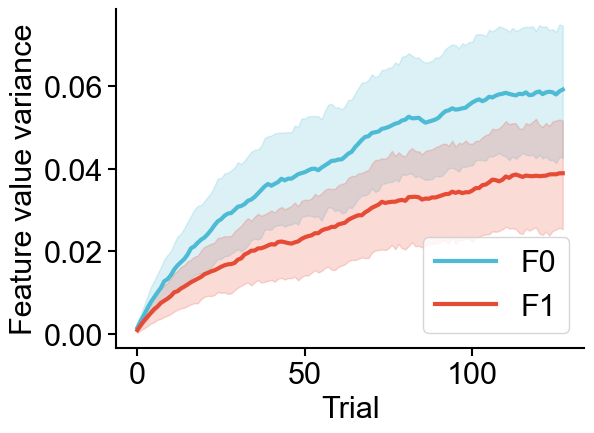

In [11]:
fig, ax = plt.subplots()
plot_mean_hpdi(ax,
    (posterior_predictive_F['values']).var(-1)[...,0].mean(2),
    color='#4dbbd5', label='F0')
plot_mean_hpdi(ax,
    (posterior_predictive_F['values']).var(-1)[...,1].mean(2),
    color='#e64b35', label='F1')
sns.despine()
ax.legend(loc='lower right')
ax.set_xlabel('Trial')
ax.set_ylabel('Feature value variance')
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "sim_rl_ft_val_var.pdf"))

In [12]:
def get_correct_choice(data):
    all_correct_choices = []
    for ses_data in data:
        correct_choice = (ses_data['probs'][:,1]>ses_data['probs'][:,0]).astype(float)
        correct_choice[ses_data['probs'][:,0]==ses_data['probs'][:,1]] = np.nan
        all_correct_choices.append(correct_choice)
    all_correct_choices = jnp.stack(all_correct_choices)
    return all_correct_choices

all_correct_choices = get_correct_choice(data)

In [13]:
def get_performance(data):
    all_choose_better = []
    for sesdata in data:
        unambiguous_choose_better = sesdata['choose_better'].astype(float)
        unambiguous_choose_better[sesdata['probs'][:,0]==sesdata['probs'][:,1]] = np.nan
        all_choose_better.append(unambiguous_choose_better)
    all_choose_better = jnp.stack(all_choose_better)
    return all_choose_better

all_choose_better = get_performance(data)

In [14]:

posterior_predictive_perf_F = (posterior_predictive_F['choice'].transpose(0,2,1)==all_correct_choices).astype(float)
posterior_predictive_perf_F = posterior_predictive_perf_F.at[:,jnp.isnan(all_correct_choices)].multiply(jnp.nan)
posterior_predictive_perf_O = (posterior_predictive_O['choice'].transpose(0,2,1)==all_correct_choices).astype(float)
posterior_predictive_perf_O = posterior_predictive_perf_O.at[:,jnp.isnan(all_correct_choices)].multiply(jnp.nan)
# posterior_predictive_perf_FO = (posterior_predictive_FO['choice']==all_correct_choices)
# posterior_predictive_perf_FO = posterior_predictive_perf_FO.at[:,jnp.isnan(all_correct_choices)].multiply(jnp.nan)

# for i in range(100):
#     rwd = full_rwd.reshape((-1, 2))[np.arange(57*128), posterior_predictive_F['choice'][i].flatten()].reshape(57, 128)
#     axes[0].plot(nanmovmean(rwd.T, 20), 'lightgrey', alpha=0.1)
#     rwd = full_rwd.reshape((-1, 2))[np.arange(57*128), posterior_predictive_O['choice'][i].flatten()].reshape(57, 128)
#     axes[1].plot(nanmovmean(rwd.T, 20), 'lightgrey', alpha=0.1)
#     rwd = full_rwd.reshape((-1, 2))[np.arange(57*128), posterior_predictive_FO['choice'][i].flatten()].reshape(57, 128)
#     axes[2].plot(nanmovmean(rwd.T, 20), 'lightgrey', alpha=0.1)
# plt.show()

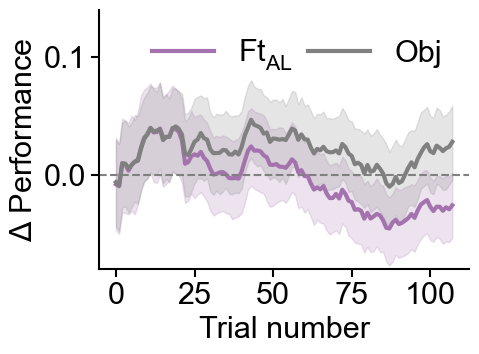

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(5.6, 4))

wsize=20

plot_mean_hpdi(axes, nanmovmean(np.nanmean(posterior_predictive_perf_F, 1)-np.nanmean(all_choose_better, 0), 
                                   window_size=wsize, axis=1), 
               color='#A473AE', label='$Ft_{AL}$', axis=0)
# axes[0].axhline(0, linestyle='--', color='k')
# axes[0].plot(jnp.nanmean(all_choose_better,0), '--k')
plot_mean_hpdi(axes, nanmovmean(np.nanmean(posterior_predictive_perf_O, 1)-np.nanmean(all_choose_better, 0), 
                                   window_size=wsize, axis=1), 
               color='grey', label='Obj', axis=0)

# axes.plot(np.nanmean(nanmovmean(all_choose_better, window_size=wsize, axis=1), axis=0),
#           color='grey', label='Empirical')
# axes[1].axhline(0, linestyle='--', color='k')
# axes[1].plot(jnp.nanmean(all_choose_better,0), '--k')
# plot_mean_hpdi(axes, nanmovmean(posterior_predictive_perf_FO.astype(float)-all_choose_better,
#                                    window_size=wsize, axis=2), color='black', label='F+O')
# axes[2].axhline(0, linestyle='--', color='k')
# axes[2].plot(jnp.nanmean(all_choose_better,0), '--k')
# axes.plot(jnp.nanmean(nanmovmean(all_choose_better, window_size=wsize, axis=1), 0), '--k')
axes.axhline(0, linestyle='--', color='grey')
axes.set_xlabel('Trial number')
axes.set_xticks(np.arange(0, 101,25))
axes.set_ylabel(r'$\Delta$ Performance')
axes.set_ylim([-0.08, 0.14])

axes.legend(ncols=2, frameon=False, columnspacing=0.5)
sns.despine()
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "sim_learning_curves.pdf"))


In [65]:
f_o_fit_diff = (F_trialwise_waic.waic_i.values.sum(0)-O_trialwise_waic.waic_i.values.sum(0))

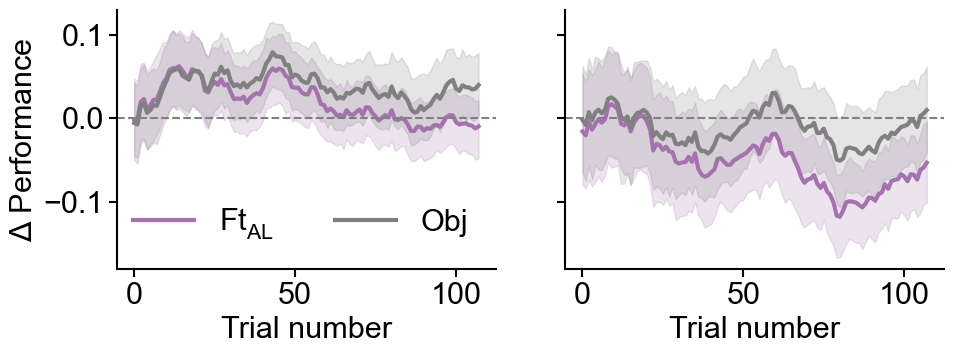

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

wsize=20

plot_mean_hpdi(axes[0], nanmovmean(np.nanmean(posterior_predictive_perf_F[:,f_o_fit_diff>=0], 1)-np.nanmean(all_choose_better[f_o_fit_diff>=0], 0), 
                                   window_size=wsize, axis=1), 
               color='#A473AE', label='$Ft_{AL}$', axis=0)
# axes[0].axhline(0, linestyle='--', color='k')
# axes[0].plot(jnp.nanmean(all_choose_better,0), '--k')
plot_mean_hpdi(axes[0], nanmovmean(np.nanmean(posterior_predictive_perf_O[:,f_o_fit_diff>=0], 1)-np.nanmean(all_choose_better[f_o_fit_diff>=0], 0), 
                                   window_size=wsize, axis=1), 
               color='grey', label='Obj', axis=0)

plot_mean_hpdi(axes[1], nanmovmean(np.nanmean(posterior_predictive_perf_F[:,f_o_fit_diff<0], 1)-np.nanmean(all_choose_better[f_o_fit_diff<0], 0), 
                                   window_size=wsize, axis=1), 
               color='#A473AE', label='$Ft_{AL}$', axis=0)
# axes[0].axhline(0, linestyle='--', color='k')
# axes[0].plot(jnp.nanmean(all_choose_better,0), '--k')
plot_mean_hpdi(axes[1], nanmovmean(np.nanmean(posterior_predictive_perf_O[:,f_o_fit_diff<0], 1)-np.nanmean(all_choose_better[f_o_fit_diff<0], 0), 
                                   window_size=wsize, axis=1), 
               color='grey', label='Obj', axis=0)

# axes.plot(np.nanmean(nanmovmean(all_choose_better, window_size=wsize, axis=1), axis=0),
#           color='grey', label='Empirical')
# axes[1].axhline(0, linestyle='--', color='k')
# axes[1].plot(jnp.nanmean(all_choose_better,0), '--k')
# plot_mean_hpdi(axes, nanmovmean(posterior_predictive_perf_FO.astype(float)-all_choose_better,
#                                    window_size=wsize, axis=2), color='black', label='F+O')
# axes[2].axhline(0, linestyle='--', color='k')
# axes[2].plot(jnp.nanmean(all_choose_better,0), '--k')
# axes.plot(jnp.nanmean(nanmovmean(all_choose_better, window_size=wsize, axis=1), 0), '--k')

for ax in axes:
    ax.axhline(0, linestyle='--', color='grey')
    ax.set_xlabel('Trial number')

axes[0].set_ylabel(r'$\Delta$ Performance')
axes[0].legend(ncols=2, loc='lower right', frameon=False)
sns.despine()
fig.tight_layout(w_pad=2)
plt.savefig(os.path.join(figure_data_dir, "sim_learning_curves_FO.pdf"))
